In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.special import perm, comb
from scipy.stats import kurtosis, skew
from statistics import NormalDist
from itertools import permutations, combinations
from fractions import Fraction
from IPython.display import display, Latex

# Reference

> [Unit: Sampling Distribution](https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library)

---

# What is a sampling distribution?

---

## Introduction of sampling distribution

The **sampling distribution** of a statistic is the [distribution](https://en.wikipedia.org/wiki/Probability_distribution "Probability distribution") of that statistic, considered as a [random variable](https://en.wikipedia.org/wiki/Random_variable "Random variable"), when derived from a [random sample](https://en.wikipedia.org/wiki/Random_sample "Random sample") of size $\displaystyle n$. It may be considered as the distribution of the statistic for _all possible samples from the same population_ of a given sample size. The sampling distribution depends on the underlying [distribution](https://en.wikipedia.org/wiki/Probability_distribution "Probability distribution") of the population, the statistic being considered, the sampling procedure employed, and the sample size used.

In [2]:
# Assume there are three elements 1, 2, 3 in a population
population = [1, 2, 3]
population_mean = np.mean(population)
population_mean

2.0

In [3]:
# if we randomly pick two elements with replacement from the population,
# the sample space S is shown as below
S = list(combinations(population + population, 2))
S = pd.DataFrame(S, columns=['pick_1', 'pick_2'])
S

,pick_1,pick_2
0,1,2
1,1,3
2,1,1
3,1,2
4,1,3
5,2,3
6,2,1
7,2,2
8,2,3
9,3,1


In [4]:
# The sample mean is
S['sample mean'] = S.mean(axis=1)
S

,pick_1,pick_2,sample mean
0,1,2,1.5
1,1,3,2.0
2,1,1,1.0
3,1,2,1.5
4,1,3,2.0
5,2,3,2.5
6,2,1,1.5
7,2,2,2.0
8,2,3,2.5
9,3,1,2.0


In [5]:
S['sample mean'].value_counts()

2.0    5
1.5    4
2.5    4
1.0    1
3.0    1
Name: sample mean, dtype: int64

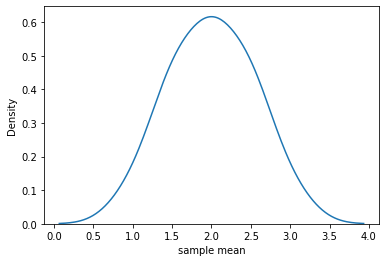

In [6]:
sns.kdeplot(x=S['sample mean']);

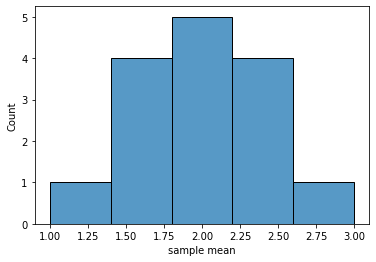

In [7]:
sns.histplot(x=S['sample mean'], legend=False);

---

## Sampling distribution of normal distribution

For example, consider a [normal](https://en.wikipedia.org/wiki/Normal_distribution "Normal distribution") population with mean $\displaystyle \mu$ and variance $\displaystyle \sigma^2$. Assume we repeatedly take samples of a given size $n$ from this population and calculate the [arithmetic mean](https://en.wikipedia.org/wiki/Arithmetic_mean "Arithmetic mean") $\displaystyle \bar x$ for each sample – this statistic is called the [sample mean](https://en.wikipedia.org/wiki/Sample_mean "Sample mean"). The distribution of these means, or averages, is called the "sampling distribution of the sample mean". This distribution is normal $\displaystyle {\mathcal {N}}(\mu ,\sigma ^{2}/n)$ ($n$ is the sample size) since the underlying population is normal, although sampling distributions may also often be close to normal even when the population distribution is not (see [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem "Central limit theorem")). An alternative to the sample mean is the sample [median](https://en.wikipedia.org/wiki/Median "Median"). When calculated from the same population, it has a different sampling distribution to that of the mean and is generally not normal (but it may be close for large sample sizes).

---

## Biased and unbiased esitmators

A statistic is an unbiased estimator of a parameter when the mean of its sampling distribution is equal to value of the parameter. In other words, a statistic is unbiased when, on average, it equals the value of the population parameter which it is estimating.

---

### Example 1

The dotplots below show an approximation to the sampling distribution for three different estimators of the same population parameter.

![](https://raw.githubusercontent.com/ZacksAmber/PicGo/master/img/20220411193255.png)

**If the actual value of the population parameter is $2$, which dotplot displays the estimator with both high bias and low variability?**

Statistic C

---

### Example 2

The dotplots below show an approximation to the sampling distribution for three different estimators of the same population parameter.

![](https://raw.githubusercontent.com/ZacksAmber/PicGo/master/img/20220411204240.png)

**If the actual value of the population parameter is $2$, which dotplot displays the estimator with low bias and high variability?**

Statistic B

---

# Sampling distribution of a sample proportion

> [Sample Distribution of a Sample Proportion Example](https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library/sample-proportions/a/sampling-distribution-sample-proportion-example)

- Population mean: $\displaystyle \mu$
- Population variance: $\displaystyle \sigma^2$
- The sampling distribution of a sample proportion: $\hat p$
- Sample size: $\displaystyle n$
- The mean of sample proportion: $\displaystyle \mu_{\hat p} = p$
- Sample standard deviation: $\displaystyle \sigma_{\hat p} = \sqrt{\frac{pq}{n}}$

Note: For this standard deviation formula to be accurate, our sample size needs to be $10\%$ or less of the population so we can assume independence.

---

## The normal condition for sample proportions

Rule of thumb: if the following conditions exist, the sampling distribution of the sample proportion is approximately normal.

Condition:
- $np \geq 10$ and $nq \geq 10$

What if condition is failed:
- If $np < 10$, the shape of the sampling distribution is skewed to right.
- If $nq < 10$, the shape of the sampling distribution is skewed to left.

---

### Example 1

A quality control inspector routinely takes random samples of $200$ cans of fruit cocktail produced in a packing plant and calculates the proportion $\hat p$ of cans from each sample with at least $3$ cherries. Suppose that $98\%$ of fruit cocktail cans produced in that packing plant contain at least $3$ cherries.

**Which of the following distributions is the best approximation of the sampling distribution of $\hat p$?**  
_Each distribution uses the same scale._

In [8]:
n, p = 200, 0.98
print(n * p)
print(round(n * (1 - p)))

196.0
4


- Expected successes: $np = 196 \geq 10$
- Expected failures: $n(1-p) = 4 \leq 10$

Since we only expect $4$ cans with fewer than $3$ cherries in the sample, which is less than $10$ cans, the sample proportions will not be normally distributed.

Since the probability of getting a can with at least $3$ cherries is relatively high, we expect a large percentage of most of the samples to have at least $3$ cherries. Some samples however could have a relatively lower percentage of cans with at least $3$ cherries.

So the proportion of $\hat p$ will be high in most samples and skewed toward the lower proportions.

![](https://raw.githubusercontent.com/ZacksAmber/PicGo/master/img/20220411233805.png)

---

## Mean and standard deviation of sample proportions

- Population mean: $\displaystyle \mu$
- Population variance: $\displaystyle \sigma^2$
- The sampling distribution of a sample proportion: $\hat p$
- Sample size: $\displaystyle n$
- The mean of sample proportion: $\displaystyle \mu_{\hat p} = p$
- Sample standard deviation: $\displaystyle \sigma_{\hat p} = \sqrt{\frac{pq}{n}}$

Note: For this standard deviation formula to be accurate, our sample size needs to be $10\%$ or less of the population so we can assume independence.

---

### Example 1

A group of science students plans to take an SRS (simple random sample) of $25$ days in the year to see what proportion of days sampled have a low below $0 ^\circ\text{C}$ in a particular city. Suppose that $41\%$ of days in the city have a low temperature below $0 ^\circ\text{C}$.

Let $\hat p$ represent the proportion of a sample of $25$ days with a low temperature below $0 ^\circ\text{C}$.

**What are the mean and standard deviation of the sampling distribution of $\hat p$**

In [9]:
p = 0.41
q = 1 - p
n = 25
precision = 2

# check is the sampling distribution approximate normal
print(n * p >= 10)
print(n * q >= 10)

True
True


In [10]:
sample_sd = np.sqrt(p * q / n)

display(Latex("$\displaystyle \mu_{\hat p} = $" + f"${p}$"))
display(Latex("$\displaystyle \sigma_{\hat p} = $" + f"${round(sample_sd, precision)}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

---

### Example 2

The manager of a customer support center takes an SRS of $40$ reported issues and finds that $22\%$ of the sampled issues required more than one call to resolve. The manager may take an SRS like this each month. Suppose that it is really an average of $25\%$ of the approximately $1000$ issues reported per month that require more than one call.

Let $\hat p$ represent the proportion of a sample of $40$ reported issues that require more than one call to resolve.

**What are the mean and standard deviation of the sampling distribution of $\hat p$?**

- $\displaystyle \mu_{\hat p} = p = 25\%$
- $\displaystyle \mu_{\sigma_{\hat p}} = \sqrt{\frac{0.25 \cdot 0.75}{40}}$

---

## Finding probabilities with sample proportions

If the sampling distribution is approximately normal, we can calculate the probability of the certain events by CDF(Cumulative distribution function) of normal distribution.

---

### Example 1

Suppose that $15\%$ of the $1750$ students at a school have experienced extreme levels of stress during the past month. A high school newspaper doesn't know this figure, but they are curious what it is, so they decide to ask a simple random sample of $160$ students if they have experienced extreme levels of stress during the past month. Subsequently, they find that $10\%$ of the sample replied “yes” to the question.

**Assuming the true proportion is $15\%$, what is the approximate probability that more than $10\%$ of the sample would report that they experienced extreme levels of stress during the past month?**

In [11]:
p = 0.15
q = 1 - p
n = 160
precision = 2

# check is the sampling distribution approximately normal
print(n * p >= 10)
print(n * q >= 10)

True
True


In [12]:
sample_sd = np.sqrt(p * q / n)

display(Latex("$\displaystyle \mu_{\hat p} = $" + f"${p}$"))
display(Latex("$\displaystyle \sigma_{\hat p} = $" + f"${round(sample_sd, precision)}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [13]:
# probability above a value
dp = 0.1
prop = 1 - NormalDist(mu=p, sigma=sample_sd).cdf(dp)
prop = round(prop, precision)
display(Latex(f"$P(\hat p > {dp}) = {prop}$"))

<IPython.core.display.Latex object>

---

### Example 2

According to the 2011 National Survey of Fishing, Hunting, and Wildlife-Associated Recreation, there were over $71$ million wildlife watchers in the US. Of these wildlife watchers, the survey reports that $80\%$ actively observed mammals. Suppose that one of the census workers repeated the survey with a simple random sample of only $500$ wildlife watchers that same year.

**Assuming that the original survey's $80\%$ claim is correct, what is the approximate probability that between $79\%$ and $81\%$ of the $500$ sampled wildlife watchers actively observed mammals in 2011?**

In [14]:
p = 0.8
q = 1 - p
n = 500
precision = 2

# check is the sampling distribution approximately normal
print(n * p >= 10)
print(n * q >= 10)

True
True


In [15]:
sample_sd = np.sqrt(p * q / n)

display(Latex("$\displaystyle \mu_{\hat p} = $" + f"${p}$"))
display(Latex("$\displaystyle \sigma_{\hat p} = $" + f"${round(sample_sd, precision)}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [16]:
# Proportion between two values
dp1, dp2  = 0.79, 0.81
p1 = NormalDist(p, sample_sd).cdf(dp1)
p2 = 1 - NormalDist(p, sample_sd).cdf(dp2)
prop = 1 - (p1 + p2)
prop = round(prop, precision)
display(Latex(f"$P({dp1} \leq \hat p < {dp2}) = {prop}$"))

<IPython.core.display.Latex object>

---

# Sampling distribution of a sample mean

> [Sampling distribution of a sample mean example](https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library/sample-means/a/sampling-distribution-sample-mean-example)

[Statistical parameter](https://en.wikipedia.org/wiki/Statistical_parameter): In [statistics](https://en.wikipedia.org/wiki/Statistics "Statistics"), as opposed to its general [use in mathematics](https://en.wikipedia.org/wiki/Parameter "Parameter"), a **parameter** is any measured quantity of a [statistical population](https://en.wikipedia.org/wiki/Statistical_population "Statistical population") that summarises or describes an aspect of the population, such as a [mean](https://en.wikipedia.org/wiki/Mean "Mean") or a [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation "Standard deviation"). If a population exactly follows a known and defined distribution, for example the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution "Normal distribution"), then a small set of parameters can be measured which completely describes the population, and can be considered to define a [probability distribution](https://en.wikipedia.org/wiki/Probability_distribution "Probability distribution") for the purposes of extracting [samples](https://en.wikipedia.org/wiki/Sample_(statistics) "Sample (statistics)") from this population.

A parameter is to a [population](https://en.wikipedia.org/wiki/Statistical_population "Statistical population") as a [statistic](https://en.wikipedia.org/wiki/Statistic "Statistic") is to a [sample](https://en.wikipedia.org/wiki/Statistical_sample "Statistical sample"); that is to say, a parameter describes the ***true value*** calculated from the full population, whereas a statistic is an estimated measurement of the parameter based on a subsample. Thus a "statistical parameter" can be more specifically referred to as a **population parameter**.

For example:
- Population mean (parameter): $\mu$
- Sample mean (statistic): $\bar x$
- The mean of the sampling distribution of a sample mean (statistic): $\mu_{\bar x} = \mu$

---

## [Central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)

In [probability theory](https://en.wikipedia.org/wiki/Probability_theory "Probability theory"), the **central limit theorem** (**CLT**) establishes that, in many situations, when [independent random variables](https://en.wikipedia.org/wiki/Statistical_independence "Statistical independence") are summed up, their properly [normalized](https://en.wikipedia.org/wiki/Normalization_(statistics) "Normalization (statistics)") sum tends toward a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution "Normal distribution") even if the original variables themselves are not normally distributed. The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions.

Conditions:
- Random independent sample
- Sample size is large $(n \geq 30)$ or Population distribution is normal

If condition is failed:
- If sample size is not large engough $(n < 30)$, the shape of the sampling distribution will match the shape of the population distribution.

---

### Simulation of central limit theorem

To deliberately simulate extreme situations, let's say there is an unfair dice with $40\%$ of rolling $3$ and $4$ and $10\%$ of rolling $3$ and $4$. And we have no chance to roll $2$ and $5$. For each trial, we roll the dice $n$ times as the sample size.

In [17]:
X = np.array([1, 2, 3, 4, 5, 6])
P = np.array([0.4, 0, 0.1, 0.1, 0, 0.4])
E = round(np.sum(X * P), 2) # expected value
E

3.5

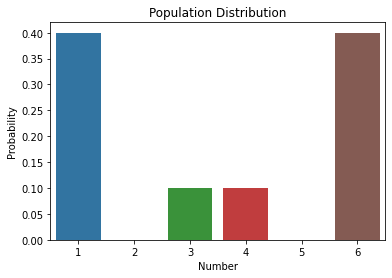

In [18]:
sns.barplot(x=X, y=P)
plt.title("Population Distribution")
plt.ylabel("Probability")
plt.xlabel("Number");

In [19]:
def bootstrap(X, n, P, n_trials):
    rng = np.random.default_rng(2022) # random seed
    samples_mean = np.array([])
    for i in range(n_trials):
        sample = rng.choice(a=X, size=n, replace=True, p=P)
        samples_mean = np.append(samples_mean, np.mean(sample))

    return samples_mean

def histogram(X, n, P, n_trials):
    samples_mean = bootstrap(X=X, n=n, P=P, n_trials=n_trials)
    sns.histplot(samples_mean, stat='probability') # 'probability', 'percent', 'density'
    plt.title("Sample Distribution of the Sample Mean")
    plt.ylabel("Probability")
    plt.xlabel("Sample Mean")
    display(Latex(f"$\overline x = {round(np.mean(samples_mean), 2)}$"))
    display(Latex(f"$median = {round(np.median(samples_mean), 2)}$"))
    display(Latex(f"$\overline \sigma = {round(np.std(samples_mean), 2)}$"))
    display(Latex(f"$skew = {round(skew(samples_mean), 2)}$"))
    display(Latex(f"$kurtosis = {round(kurtosis(samples_mean), 2)}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

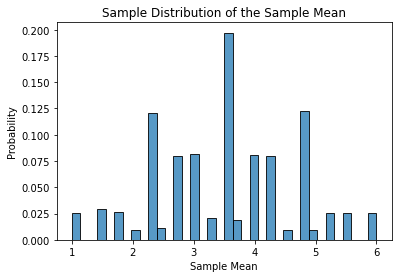

In [20]:
# for n = 4
histogram(X=X, n=4, P=P, n_trials=10000)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

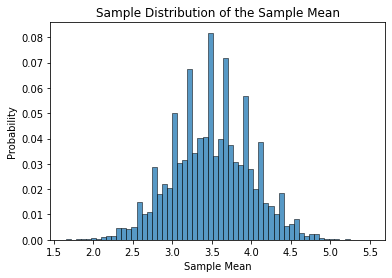

In [21]:
# for n = 20
histogram(X=X, n=20, P=P, n_trials=10000)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

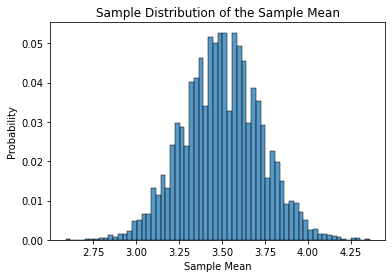

In [22]:
# for n = 100
histogram(X=X, n=100, P=P, n_trials=10000)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

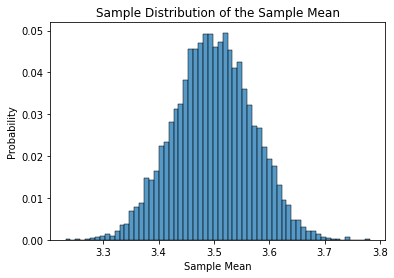

In [23]:
# for n = 1000
histogram(X=X, n=1000, P=P, n_trials=10000)

---

### Example 1

Teachers in a district have been teaching for a mean of $8$ years with a standard deviation of $3$ years, and the distribution of years teaching is strongly skewed to the right.

Suppose we took random samples of $30$ teachers from this district and calculated $\bar x$ as the sample mean of how long each group of teachers had been teaching. We can assume that the teachers in each sample are independent.

**What would be the shape of the sampling distribution of $\bar x$?**

Approximately normal.

The sample size is large $(n=30 \geq 30)$, so the sampling distribution of $\bar x$ will be approximately normal even though the population is skewed.

---

## [Standard error](https://en.wikipedia.org/wiki/Standard_error) of the mean (SEM)

The **standard error** (**SE**, the standard deviation of the sampling distribution of the sample mean)[[1]](https://en.wikipedia.org/wiki/Standard_error#cite_note-:0-1) of a [statistic](https://en.wikipedia.org/wiki/Statistic "Statistic") (usually an estimate of a [parameter](https://en.wikipedia.org/wiki/Statistical_parameter "Statistical parameter")) is the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation "Standard deviation") of its [sampling distribution](https://en.wikipedia.org/wiki/Sampling_distribution "Sampling distribution")[[2]](https://en.wikipedia.org/wiki/Standard_error#cite_note-2) or an estimate of that standard deviation. If the statistic is the sample mean, it is called the **standard error of the mean** (**SEM**).[[1]](https://en.wikipedia.org/wiki/Standard_error#cite_note-:0-1)

The [sampling distribution](https://en.wikipedia.org/wiki/Sampling_distribution "Sampling distribution") of a mean is generated by repeated sampling from the same population and recording of the sample means obtained. This forms a distribution of different means, and this distribution has its own [mean](https://en.wikipedia.org/wiki/Mean "Mean") and [variance](https://en.wikipedia.org/wiki/Variance "Variance"). Mathematically, the variance of the sampling distribution obtained is equal to the variance of the population divided by the sample size. This is because as the sample size increases, sample means cluster more closely around the population mean.

Therefore, the relationship between the standard error of the mean and the standard deviation is such that, for a given sample size, the standard error of the mean equals the standard deviation divided by the [square root](https://en.wikipedia.org/wiki/Square_root "Square root") of the sample size.[[1]](https://en.wikipedia.org/wiki/Standard_error#cite_note-:0-1) In other words, the standard error of the mean is a measure of the dispersion of sample means around the population mean.

In [regression analysis](https://en.wikipedia.org/wiki/Regression_analysis "Regression analysis"), the term "standard error" refers either to the square root of the [reduced chi-squared statistic](https://en.wikipedia.org/wiki/Reduced_chi-squared_statistic "Reduced chi-squared statistic"), or the standard error for a particular regression coefficient (as used in, say, [confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval "Confidence interval")).

### Exact Value

If a statistically independent sample of $\displaystyle n$ observations $\displaystyle x_1, x_2, \ldots, x_n$ is taken from a [statistical population](https://en.wikipedia.org/wiki/Statistical_population "Statistical population") with a [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation "Standard deviation") of $\displaystyle \sigma$, then the mean value calculated from the sample $\displaystyle \bar x$ will have an associated _standard error on the mean_ $\displaystyle \sigma_{\bar x}$ given by:

- Population Standard Deviation (parameter): $\displaystyle \sigma$
- Sample mean (statistic): $\displaystyle \bar x$
- Standard Error (parameter): $\displaystyle \sigma_{\bar x} = \frac{\sigma^2}{n} = \frac{\sigma}{\sqrt{n}}$


### Estimate

The standard deviation $\displaystyle \sigma$ of the population being sampled is seldom known. Therefore, the standard error of the mean is usually estimated by replacing $\displaystyle \sigma$ with the [sample standard deviation](https://en.wikipedia.org/wiki/Standard_deviation#Corrected_sample_standard_deviation) $\sigma_{\bar x}$ instead:

- Sample Standard Deviation (statistic): $\displaystyle \sigma_{x}$
- Standard Error (parameter): $\displaystyle \sigma_{\bar x} = \frac{\sigma_{x}^2}{n} = \frac{\sigma_{x}}{\sqrt{n}}$

As this is only an [estimator](https://en.wikipedia.org/wiki/Estimator) for the true "standard error", it is common to see other notations here such as:

- Standard Error (statistic): $\displaystyle \hat \sigma_{\bar x} = \frac{\sigma_{x}}{\sqrt{n}}$
- Standard Error (statistic): $\displaystyle s_{\bar x} = \frac{s_{x}}{\sqrt{n}}$

---

## Mean and standard deviation of sample means (SEM)

---

### Example 1

Shoppers at a mall have a mean weight of $70\text{ kg}$ with a standard deviation of $10\text{ kg}$. An elevator at the mall holds a maximum of $6$ people, and safety engineers are curious about the average weight of shoppers on a full elevator. Suppose that we take random samples of $6$ shoppers and calculate the mean weight $\bar x$ of the shoppers in each sample.

**Calculate the mean and standard deviation of the sampling distribution of $\bar x$.**

In [24]:
mu, sigma, n = 70, 10, 6
percision = 2
mu_s = mu
SE = sigma / np.sqrt(n)

In [25]:
display(Latex(f"$\overline x = {mu_s}$"))
display(Latex("$\sigma_{\overline x} =$" + f" ${round(SE, percision)}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

---

## Finding probabilities with sample means

If the sampling distribution is approximately normal, we can calculate the probability of the certain events by CDF(Cumulative distribution function) of normal distribution.

---

### Example 1

A car manufacturer crash tests a certain model of car and measures the impact force. The test and model in question produce impact forces that are normally distributed with a mean of $30$ metric tons and a standard deviation of $1.51$ metric tons. Suppose that the manufacturer tests a random sample of $4$ cars and calculates the sample mean impact force.

**What is the probability that the mean impact force from a sample of $4$ cars $\bar x$ exceeds $30.75$ metric tons?**

In [26]:
mu, sigma, n = 30, 1.51, 4
percision = 2
mu_s = mu
SE = sigma / np.sqrt(n)
dp = 30.75

# probability above a value
p = 1 - NormalDist(mu=mu_s, sigma=SE).cdf(dp)
display(Latex(f"$P(\overline x > {dp}) = {round(p, percision)}$"))

<IPython.core.display.Latex object>

---

### Example 2

A large sleep study involving over $5{,}000$ American teenagers examined how many hours the participants slept on the weekend. The nightly sleep times were distinctly non-normal with a mean of $10$ hours and a standard deviation of $2$ hours. Suppose we take a random sample of $100$ nightly sleep times from this population. We can assume that the times in the sample are independent.

**What is the probability that the mean of these $100$ sleep times $\bar x$ is farther than $0.40$ hours away from the population mean?**

In [27]:
mu, sigma, n = 10, 2, 100
percision = 2
mu_s = mu
SE = sigma / np.sqrt(n)
dp1, dp2 = mu-0.4, mu+0.4

# probability away from two values
p1 = NormalDist(mu=mu_s, sigma=SE).cdf(dp1)
p2 = 1 - NormalDist(mu=mu_s, sigma=SE).cdf(dp2)
p = p1 + p2
display(Latex(f"$P(\overline x \leq {dp1} \space \cup {dp2} > \overline x) = {round(p, percision)}$"))

<IPython.core.display.Latex object>

---

### Example 3

Mathieu grows specialty tomatoes that are much larger than typical tomatoes. The distribution of their weights is strongly skewed to the left with a mean of $232\text{g}$ and a standard deviation of $12\text{g}$. Suppose we were to calculate the mean weight from a random sample of $16$ of Mathieu's tomatoes. We can assume independence between tomatoes in the sample.

**What is the probability that the mean weight from the sample of $16$ tomatoes $\bar x$ is within $6\text{g}$ of the population mean?**

We cannot calculate this probability because the sampling distribution is not normal.

---

### Example 4

A manufacturer makes integrated circuits that each have a resistance layer with a target thickness of $200$ units. A circuit won't work well if this thickness varies too much from the target value. These thickness measurements are approximately normally distributed with a mean of $200$ units and a standard deviation of $12$ units. A random sample of $16$ measurements is selected for a quality inspection. We can assume that the measurements in the sample are independent.

**What is the probability that the mean thickness in these $16$ measurements $\bar x$ is farther than $3$ units away from the target value?**

Although the sample size is not large enough ($n = 16 < 30$), the population distribution is normal. Therefore, the sampling distribution is normal.

In [28]:
mu, sigma, n = 200, 12, 16
percision = 2
mu_s = mu
SE = sigma / np.sqrt(n)
dp1, dp2 = mu-3, mu+3

# probability away from two values
p1 = NormalDist(mu=mu_s, sigma=SE).cdf(dp1)
p2 = 1 - NormalDist(mu=mu_s, sigma=SE).cdf(dp2)
p = p1 + p2
display(Latex(f"$P(\overline x \leq {dp1} \space \cup {dp2} > \overline x) = {round(p, percision)}$"))

<IPython.core.display.Latex object>

---

### Example 5

A pizza chain monitors the total weight of pepperoni that goes on its deluxe pepperoni pizzas to make sure customers are satisfied and product isn't being wasted. Suppose that for pizzas in this population, these weights are strongly skewed to the left with a mean of $250\text{ g}$ and a standard deviation of $8\text{ g}$. Management takes a random sample of $64$ of these pizzas and calculates the mean weight of the pepperoni on the pizzas. Assume that the pizzas in the sample are independent.

**What is the probability that the mean weight of the pepperoni from the sample of $64$ pizzas $\bar x$ is within $1\text{ g}$ of the true mean?**

In [29]:
mu, sigma, n = 250, 8, 64
percision = 2
mu_s = mu
SE = sigma / np.sqrt(n)
dp1, dp2 = mu-1, mu+1

# probability within two values
p1 = NormalDist(mu=mu_s, sigma=SE).cdf(dp1)
p2 = 1 - NormalDist(mu=mu_s, sigma=SE).cdf(dp2)
p = 1 - (p1 + p2)
display(Latex(f"$P({dp1} < \overline x \leq {dp2}) = {round(p, percision)}$"))

<IPython.core.display.Latex object>